In [27]:
# ## Лабораторная работа 3_1
# Применение логистической регрессии для решения задачи бинарной классификации

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [28]:
# Загрузка и исследование данных Iris

# Загрузка датасета Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Вывод информации о датасете
print("Первые 5 строк датасета:")
display(df.head())
print("\nИнформация о датасете:")
print(df.info())
print("\nСтатистика по датасету:")
display(df.describe())
print("\nКоличество записей по сортам:")
print(df['species'].value_counts())

Первые 5 строк датасета:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   species            150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Статистика по датасету:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000



Количество записей по сортам:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


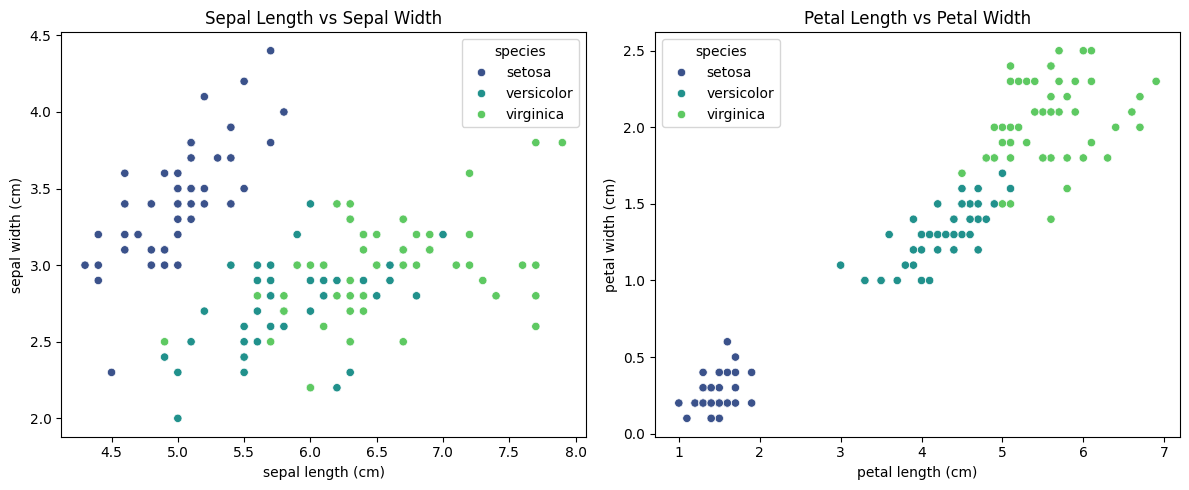

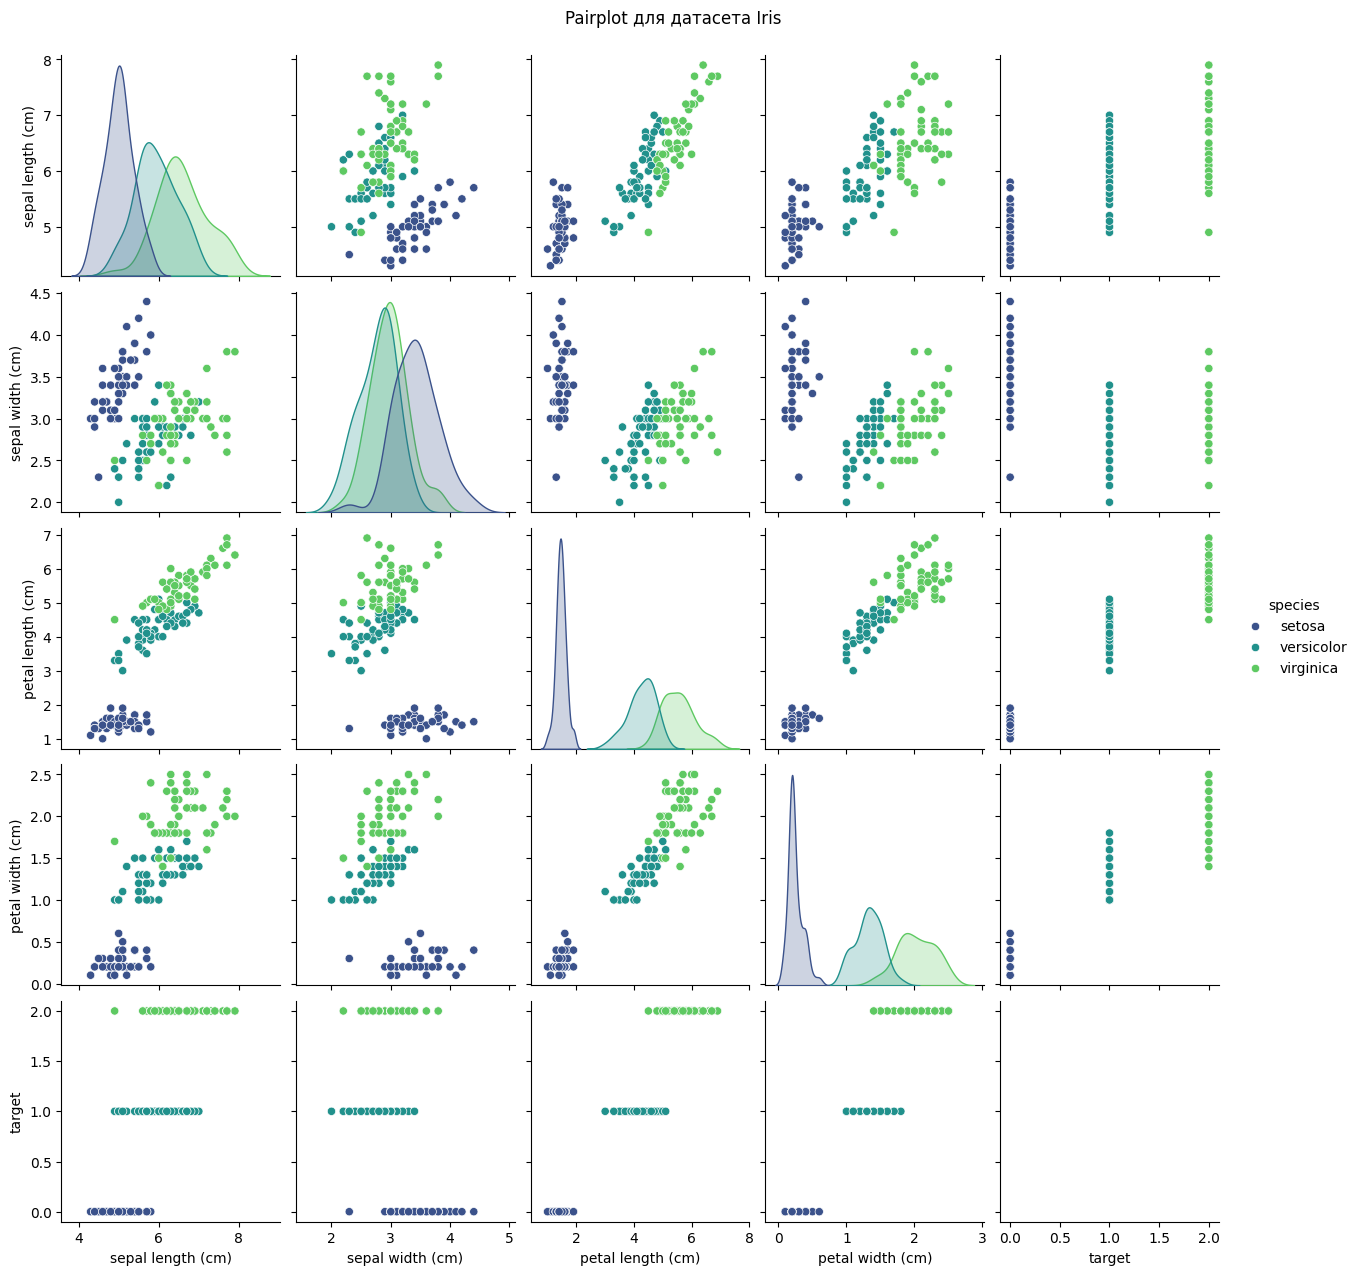

In [29]:
# Визуализация данных

# Визуализация зависимостей sepal length - sepal width и petal length - petal width
plt.figure(figsize=(12, 5))

# График sepal length vs sepal width
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='viridis')
plt.title('Sepal Length vs Sepal Width')

# График petal length vs petal width
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species', palette='viridis')
plt.title('Petal Length vs Petal Width')

plt.tight_layout()
plt.show()

# Pairplot для всего датасета
sns.pairplot(df, hue='species', palette='viridis')
plt.suptitle('Pairplot для датасета Iris', y=1.02)
plt.show()

In [30]:
# Подготовка датасетов для бинарной классификации

# Создание первого датасета (setosa и versicolor)
df_setosa_versicolor = df[df['target'].isin([0, 1])].copy()

# Создание второго датасета (versicolor и virginica)
df_versicolor_virginica = df[df['target'].isin([1, 2])].copy()

print("Количество записей в первом датасете (setosa и versicolor):", len(df_setosa_versicolor))
print("Количество записей во втором датасете (versicolor и virginica):", len(df_versicolor_virginica))

Количество записей в первом датасете (setosa и versicolor): 100
Количество записей во втором датасете (versicolor и virginica): 100


Точность модели для setosa и versicolor: 1.0000


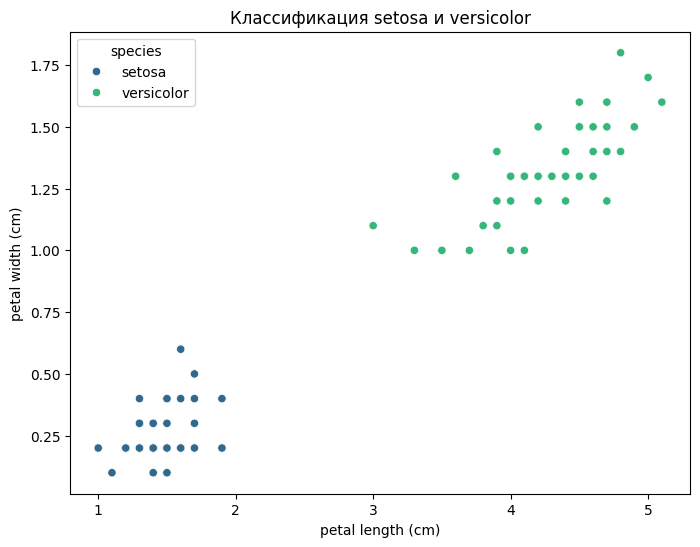

In [31]:
# Логистическая регрессия для первого датасета (setosa и versicolor)

# Подготовка данных
X1 = df_setosa_versicolor[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y1 = df_setosa_versicolor['target']

# Разделение на обучающую и тестовую выборки
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Создание и обучение модели
logreg1 = LogisticRegression(random_state=0)
logreg1.fit(X1_train, y1_train)

# Предсказание на тестовых данных
y1_pred = logreg1.predict(X1_test)

# Оценка точности модели
accuracy1 = accuracy_score(y1_test, y1_pred)
print(f"Точность модели для setosa и versicolor: {accuracy1:.4f}")

# Визуализация результатов
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_setosa_versicolor, x='petal length (cm)', y='petal width (cm)', hue='species', palette='viridis')
plt.title('Классификация setosa и versicolor')
plt.show()

Точность модели для versicolor и virginica: 0.9333


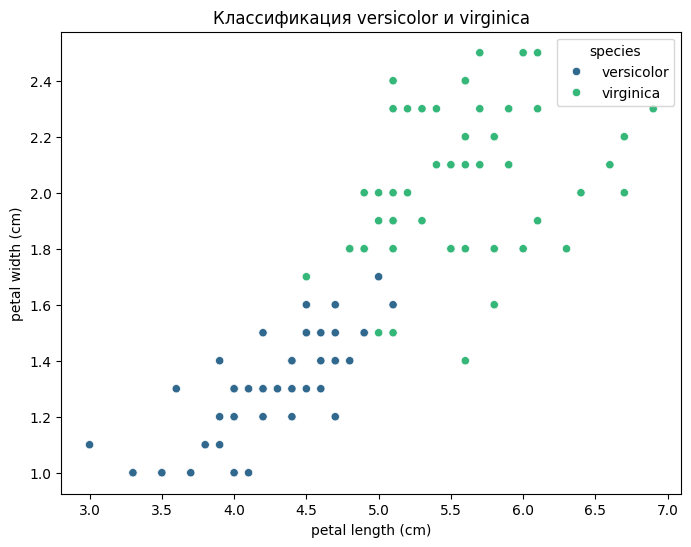

In [32]:
# Логистическая регрессия для второго датасета (versicolor и virginica)

# Подготовка данных
X2 = df_versicolor_virginica[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y2 = df_versicolor_virginica['target']

# Разделение на обучающую и тестовую выборки
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

# Создание и обучение модели
logreg2 = LogisticRegression(random_state=0)
logreg2.fit(X2_train, y2_train)

# Предсказание на тестовых данных
y2_pred = logreg2.predict(X2_test)

# Оценка точности модели
accuracy2 = accuracy_score(y2_test, y2_pred)
print(f"Точность модели для versicolor и virginica: {accuracy2:.4f}")

# Визуализация результатов
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_versicolor_virginica, x='petal length (cm)', y='petal width (cm)', hue='species', palette='viridis')
plt.title('Классификация versicolor и virginica')
plt.show()

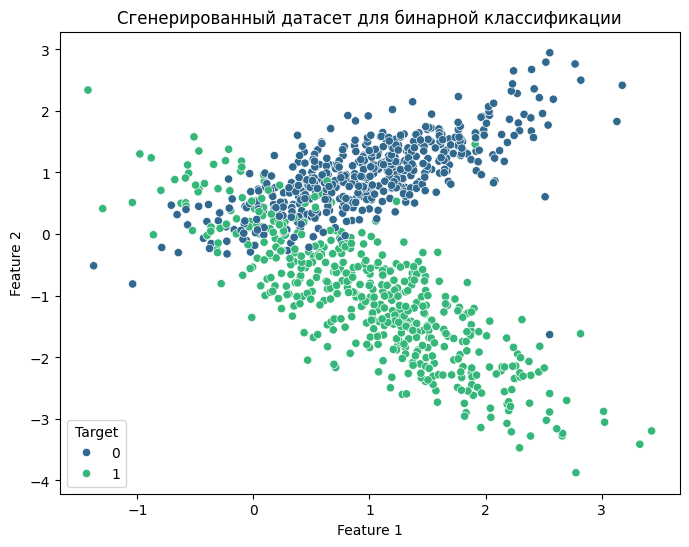

Точность модели на синтетическом датасете: 0.9367


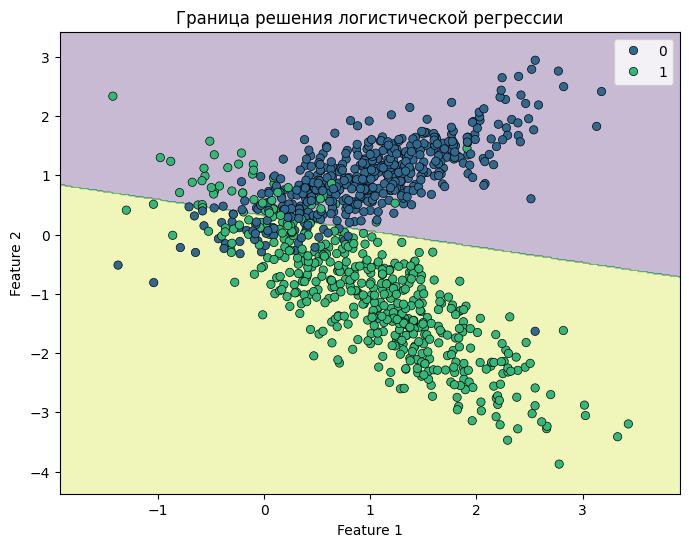

In [33]:
# Генерация синтетического датасета и бинарная классификация

# Генерация синтетического датасета
X_synth, y_synth = make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                     n_informative=2, random_state=1, n_clusters_per_class=1)

# Создание DataFrame для визуализации
df_synth = pd.DataFrame(X_synth, columns=['Feature 1', 'Feature 2'])
df_synth['Target'] = y_synth

# Визуализация синтетического датасета
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_synth, x='Feature 1', y='Feature 2', hue='Target', palette='viridis')
plt.title('Сгенерированный датасет для бинарной классификации')
plt.show()

# Разделение на обучающую и тестовую выборки
X_synth_train, X_synth_test, y_synth_train, y_synth_test = train_test_split(
    X_synth, y_synth, test_size=0.3, random_state=42)

# Создание и обучение модели
logreg_synth = LogisticRegression(random_state=0)
logreg_synth.fit(X_synth_train, y_synth_train)

# Предсказание на тестовых данных
y_synth_pred = logreg_synth.predict(X_synth_test)

# Оценка точности модели
accuracy_synth = accuracy_score(y_synth_test, y_synth_pred)
print(f"Точность модели на синтетическом датасете: {accuracy_synth:.4f}")

# Визуализация границы решения
def plot_decision_boundary(X, y, model):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', edgecolor='k')
    plt.title('Граница решения логистической регрессии')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary(X_synth, y_synth, logreg_synth)